In [1]:
import gudhi as gd
import tadasets
import math
import numpy as np
from sklearn.neighbors import KDTree
from tqdm import tqdm
import matplotlib.pyplot as plt

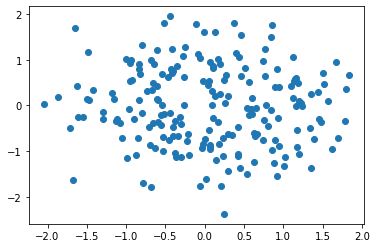

In [2]:
pts = tadasets.dsphere(n=200, d=1, noise=0.5)
# complex = gd.RipsComplex(points=pts)
# st_rips = complex.create_simplex_tree(max_dimension=2)

plt.scatter(pts[:, 0], pts[:, 1])
plt.show()

In [6]:
def DTM(X,query_pts,m):
    '''
    Compute the values of the DTM (with exponent p=2) of the empirical measure of a point cloud X
    Require sklearn.neighbors.KDTree to search nearest neighbors
    
    Input:
    X: a nxd numpy array representing n points in R^d
    query_pts:  a kxd numpy array of query points
    m: parameter of the DTM in [0,1)
    
    Output: 
    DTM_result: a kx1 numpy array contaning the DTM of the 
    query points
    
    Example:
    X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
    Q = np.array([[0,0],[5,5]])
    DTM_values = DTM(X, Q, 0.3)
    '''
    N_tot = X.shape[0]     
    k = math.floor(m*N_tot)+1   # number of neighbors

    kdt = KDTree(X, leaf_size=30, metric='euclidean')
    NN_Dist, NN = kdt.query(query_pts, k, return_distance=True)  

    DTM_result = np.sqrt(np.sum(NN_Dist*NN_Dist,axis=1) / k)
    
    return(DTM_result)

In [29]:
# List of function values
DTM_values = DTM(pts, pts, 0.01)

In [33]:
import timeit

st = gd.SimplexTree()
alpha = 4
beta = 1


def s(simplex):
    return np.max(DTM_values[simplex])

for simplex in st_rips.get_skeleton(2): 
    if len(simplex[0]) == 1:
        i = simplex[0][0]
        dens = DTM_values[i]
        if dens <= beta:
            st.insert([i], filtration=0)
        else:
            st.insert([i], filtration=(dens-beta) + (1/alpha)*(dens-beta))
    else:
        dens = s(simplex[0])
        orig_filt = simplex[1]
        if alpha>= (dens - beta)/orig_filt or dens <= beta:
            st.insert(simplex[0], filtration=alpha*orig_filt + orig_filt)
        else:
            st.insert(simplex[0], filtration=(dens-beta) + (1/alpha)*(dens-beta))

bar_code = st.persistence(2)
gd.plot_persistence_diagram(bar_code)






KeyboardInterrupt: 

In [20]:
lele = np.array([1,3,3])

kaka = np.array([1,2,3,4,5])

kaka[lele]

array([2, 4, 4])

Calculation of density 0.0011053989999822988
Building rips complex 0.004138288000007151


<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

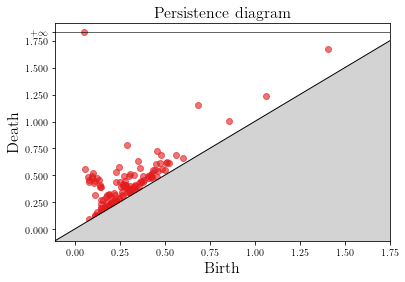

In [11]:
from mult_algo import *
st =  biline_rips_st(1,0,pts)
bar_code = st.persistence(2)
gd.plot_persistence_diagram(bar_code)

In [1]:
alpha = 1
beta = 0

start_time = timeit.default_timer()
# Density function on a simplex
DTM_values = DTM(pts, pts, 0.01)
def s(simplex):
    return np.max(DTM_values[simplex])
print(f"Calculation of density {timeit.default_timer() - start_time}")

start_time = timeit.default_timer()
# Build the rips complex
complex = gd.AlphaComplex(points=pts)
st_rips = complex.create_simplex_tree()
# st_rips = complex.create_simplex_tree()
print(f"Building rips complex {timeit.default_timer() - start_time}")

# Creation of new simplex tree
st = gd.SimplexTree()
kaka = len(list(st_rips.get_skeleton(2)))
for simplex in tqdm(st_rips.get_skeleton(2), total=kaka): 

    # Assign filtration value to each simplex (see thesis)
    if len(simplex[0]) == 1:
        i = simplex[0][0]
        dens = DTM_values[i]
        if dens <= beta:
            st.insert([i], filtration=0)
        else:
            st.insert([i], filtration=(dens-beta) + (1/alpha)*(dens-beta))
    else:
        dens = s(simplex[0])
        orig_filt = simplex[1]
        if alpha>= (dens - beta)/orig_filt or dens <= beta:
            st.insert(simplex[0], filtration=alpha*orig_filt + orig_filt)
        else:
            st.insert(simplex[0], filtration=(dens-beta) + (1/alpha)*(dens-beta))

bar_code = st.persistence(2)
gd.plot_persistence_diagram(bar_code)

NameError: name 'timeit' is not defined